In [260]:
import numpy as np
import pandas as pd
#import seaborn as sns

In [261]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [262]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [263]:
df.shape

(13320, 9)

In [264]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Prepare data for Machine Learning Model

Data Cleaning

In [265]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [266]:
df.isnull().mean()*100 

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [357]:
# society is having to many null values, 41% null values so dropping society
df2 = df.drop('society', axis='columns')
df2.shape

KeyError: "['society'] not found in axis"

In [268]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [269]:
# filling mean values in balcony since it's having 4.5% null values
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [270]:
# now after doing the necessary modifications, removing the remaining null values from the df2
df3 = df2.dropna()
df3.shape

(13246, 8)

In [271]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

# Feature Engineering

Changing the data types.

In [272]:
df3.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [273]:
#coverting the total_sqft's datatype into float
#here we observe that 'total_sqft' contain string value in diff format
#float, int like value 1689.28,817 
# range value: 540 - 740 
# number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds
# best strategy is to convert it into number by spliting it

total_sqft_int = []
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
    except:
        try:
            temp = []
            temp = str_val.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
        except:
            total_sqft_int.append(np.nan) # if value not contain in above format then consider as nan


In [274]:
df4 = df3.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [275]:
df4.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,NaN
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,NaN
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,NaN
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,NaN
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,NaN


In [276]:
df4.isnull().sum()

area_type           0
availability        0
location            0
size                0
total_sqft          0
bath                0
balcony             0
price               0
total_sqft_int    120
dtype: int64

In [277]:
df5 = df4.dropna()

In [278]:
df5.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
total_sqft_int    0
dtype: int64

In [279]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13126 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13126 non-null  object 
 1   availability    13126 non-null  object 
 2   location        13126 non-null  object 
 3   size            13126 non-null  object 
 4   total_sqft      13126 non-null  object 
 5   bath            13126 non-null  float64
 6   balcony         13126 non-null  float64
 7   price           13126 non-null  float64
 8   total_sqft_int  13126 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [280]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [281]:
#Changing the size feature to show the numeric values only
size_int = []
for str_val in df5['size']:
    temp=[]
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)

In [282]:
df6 = df5.join(pd.DataFrame({'bhk':size_int}))
df6.shape

(13126, 10)

In [283]:
df6.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2.0


# Finding Outliers and Removing the Outliers

In [284]:
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots
import scipy.stats as stats
 
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


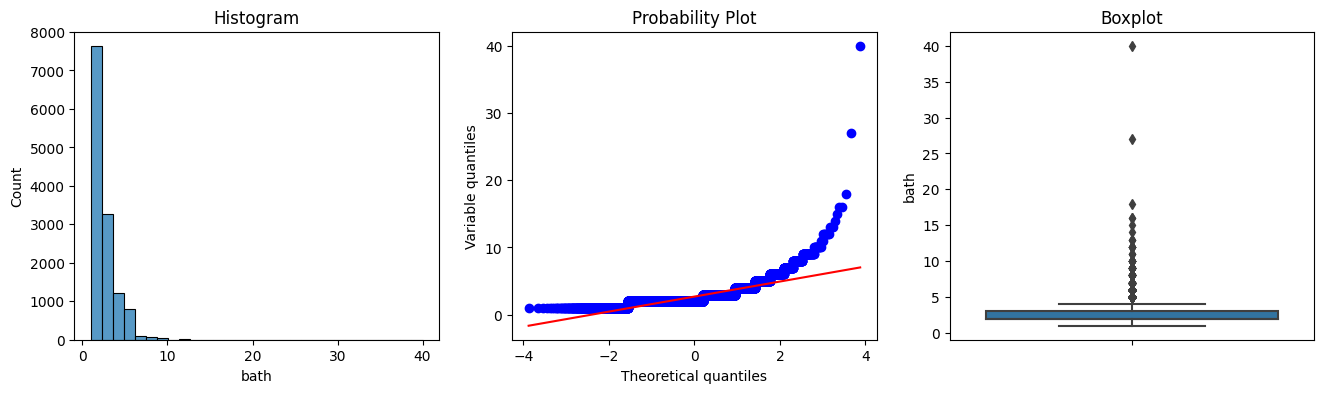

******* balcony *******


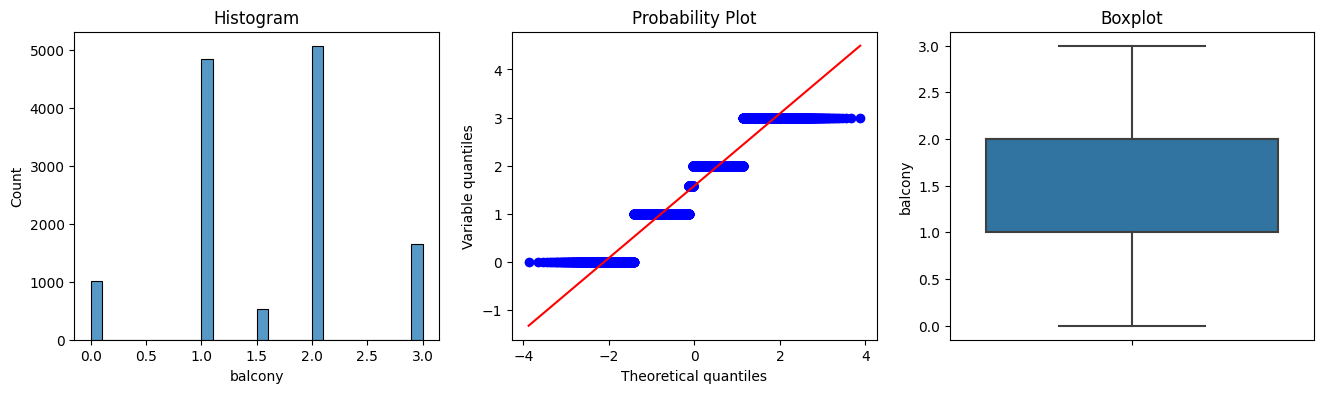

******* total_sqft_int *******


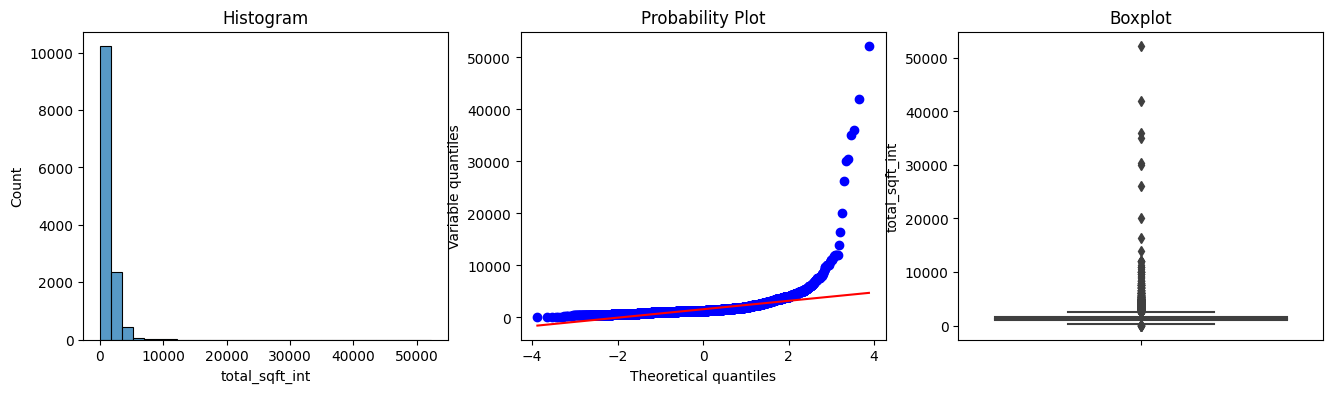

******* bhk *******


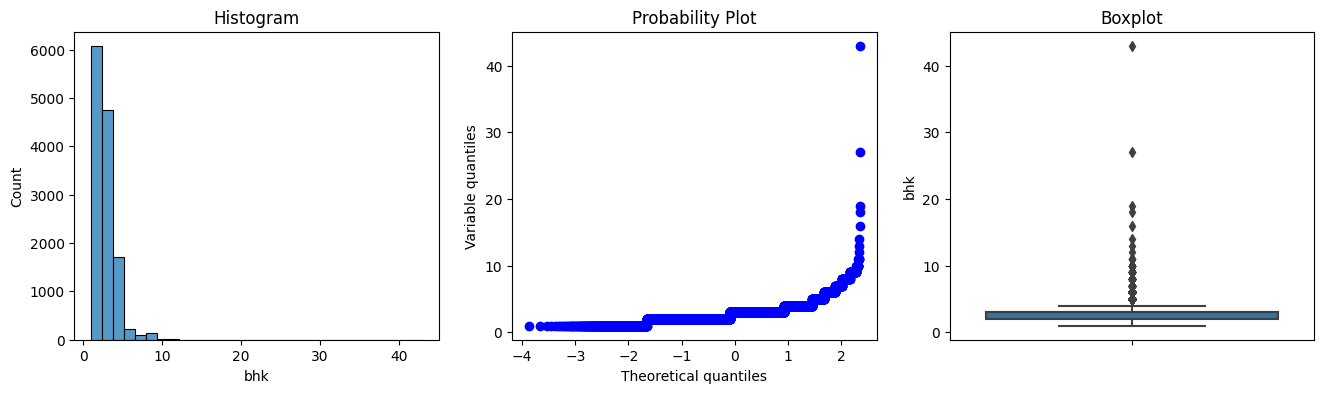

******* price *******


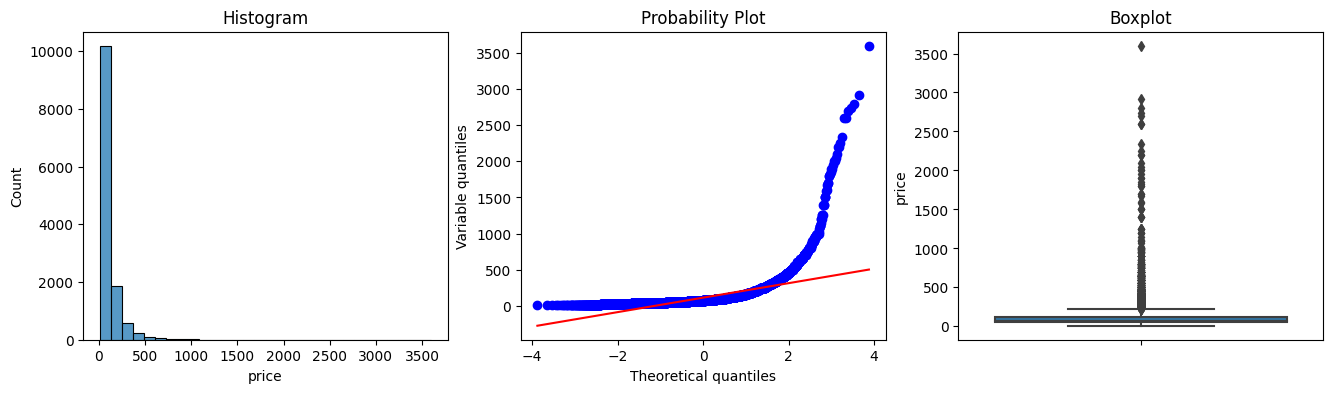

In [285]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df6, var)
 
  # here we observe outlier using histogram,, qq plot and boxplot

In [286]:
# here we consider 1 BHK requierd min 350 sqft are
df6[df6['total_sqft_int']/df6['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6.0
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2.0
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8.0
57,Super built-up Area,Ready To Move,Ramakrishnappa Layout,2 BHK,1500,2.0,2.000000,185.0,1407.0,6.0


In [287]:
# now we find the outliers
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df7 = df6[~(df6['total_sqft_int']/df6['bhk'] < 350)]
df7.shape

(10526, 10)

In [288]:
# create new feature that is price per squre foot 
# it help to find the outliers
 
#price in lakh so conver into rupee and then / by total_sqft_int
df7['price_per_sqft'] = df7['price']*100000 / df7['total_sqft_int']  
df7.head()

C:\Users\malipeddi.hanisha\AppData\Local\Temp\ipykernel_19356\3177409572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['price_per_sqft'] = df7['price']*100000 / df7['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2.0,4250.000000


In [289]:
#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235
 
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
 
df8 = remove_pps_outliers(df7)
df8.shape

(7857, 11)

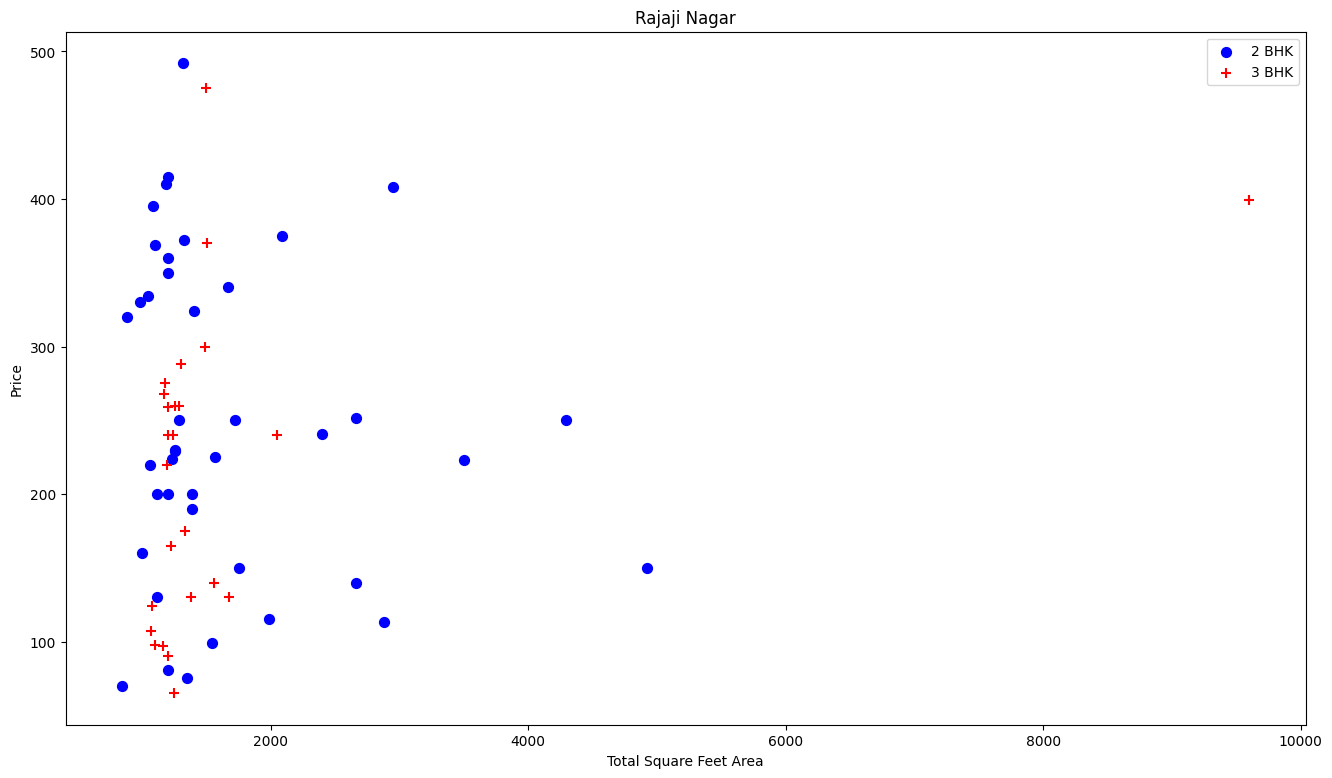

In [290]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df8, "Rajaji Nagar")

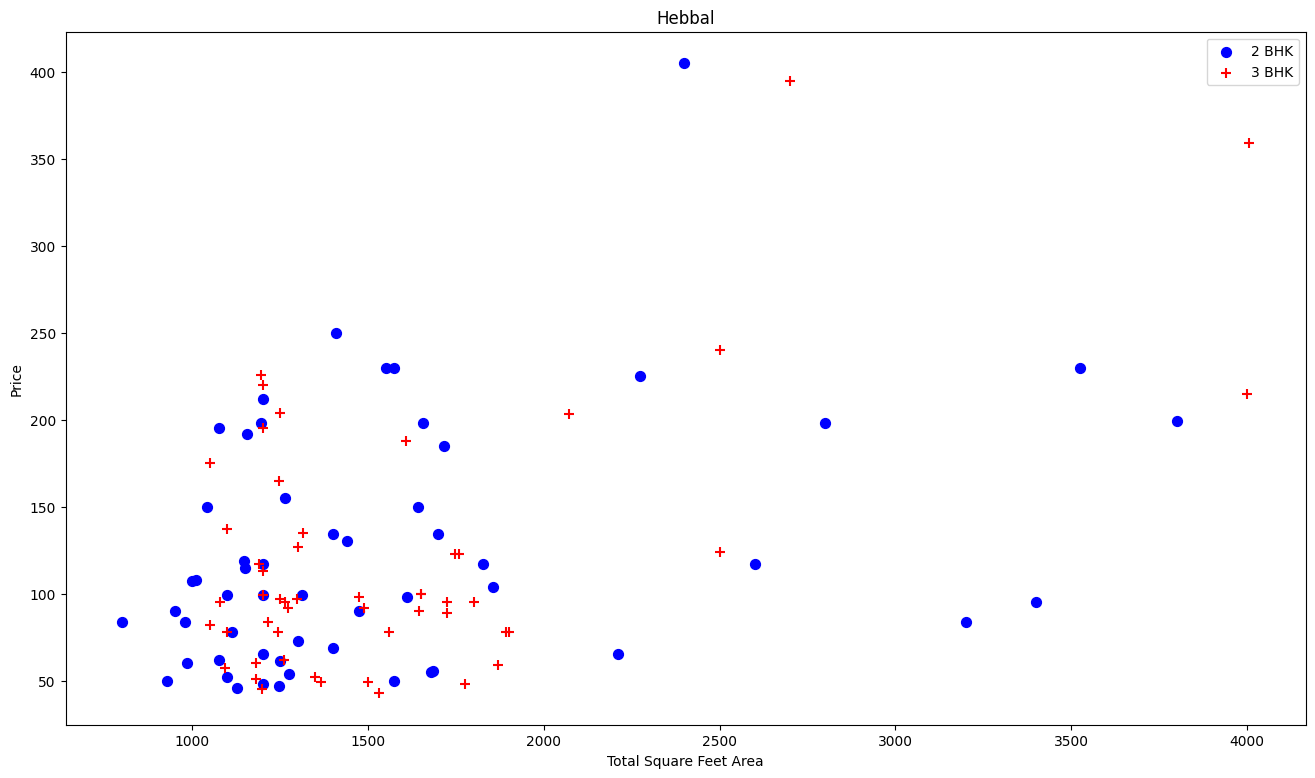

In [291]:
# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier
 
plot_scatter_chart(df8, "Hebbal")
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

In [322]:
# Removing BHK outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
            'mean':np.mean(bhk_df.price_per_sqft),
            'std':np.std(bhk_df.price_per_sqft),
            'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
 
df9 = remove_bhk_outliers(df8)
df9.shape

(5688, 11)

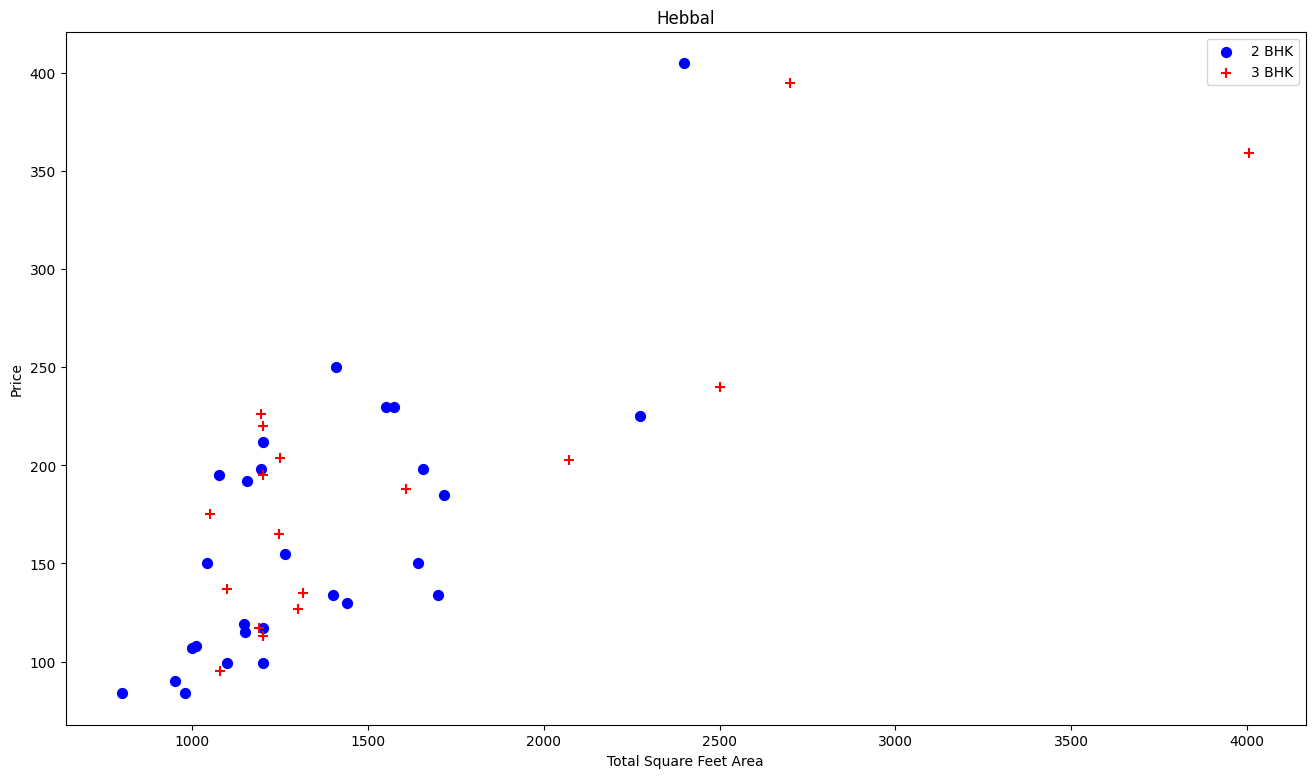

In [323]:
plot_scatter_chart(df9, "Hebbal")
# In below scatter plot most of the red data point remove fron blue points

In [324]:
"""### Remove outliers using the help of 'bath' feature"""
 
df9.bath.unique()
 
df9[df9.bath > df9.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
17,Plot Area,Ready To Move,1st Block HBR Layout,5 Bedroom,2500,6.0,3.000000,500.0,1590.00,2.0,31446.540881
19,Plot Area,Ready To Move,1st Block HRBR Layout,10 Bedroom,2416,10.0,1.584376,600.0,4500.00,4.0,13333.333333
25,Super built-up Area,17-Dec,1st Block Jayanagar,6 BHK,1200,6.0,2.000000,125.0,1897.00,3.0,6589.351608
36,Plot Area,Ready To Move,1st Phase JP Nagar,8 Bedroom,1200,7.0,2.000000,240.0,1420.00,4.0,16901.408451
46,Super built-up Area,Ready To Move,1st Phase JP Nagar,4 BHK,2615,5.0,3.000000,222.0,1126.00,1.0,19715.808171
52,Plot Area,Ready To Move,2nd Block Hrbr Layout,5 Bedroom,1250,5.0,1.584376,300.0,900.00,2.0,33333.333333
54,Plot Area,18-Feb,2nd Block Jayanagar,6 Bedroom,825,6.0,1.584376,400.0,3200.00,2.0,12500.000000
59,Plot Area,Ready To Move,2nd Phase JP Nagar,8 Bedroom,1350,8.0,2.000000,185.0,1150.00,3.0,16086.956522
61,Plot Area,Ready To Move,2nd Phase JP Nagar,6 Bedroom,900,6.0,3.000000,170.0,1590.00,2.0,10691.823899
71,Plot Area,Ready To Move,2nd Stage Nagarbhavi,6 Bedroom,3000,8.0,3.000000,451.0,2805.00,3.0,16078.431373


In [325]:
# here we are considering data only total no. bathroom =  bhk + 1
df10 = df9[df9.bath < df9.bhk+2]
df10.shape

(4860, 11)

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2 BHK,1100,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1200.0,2.0,3333.333333


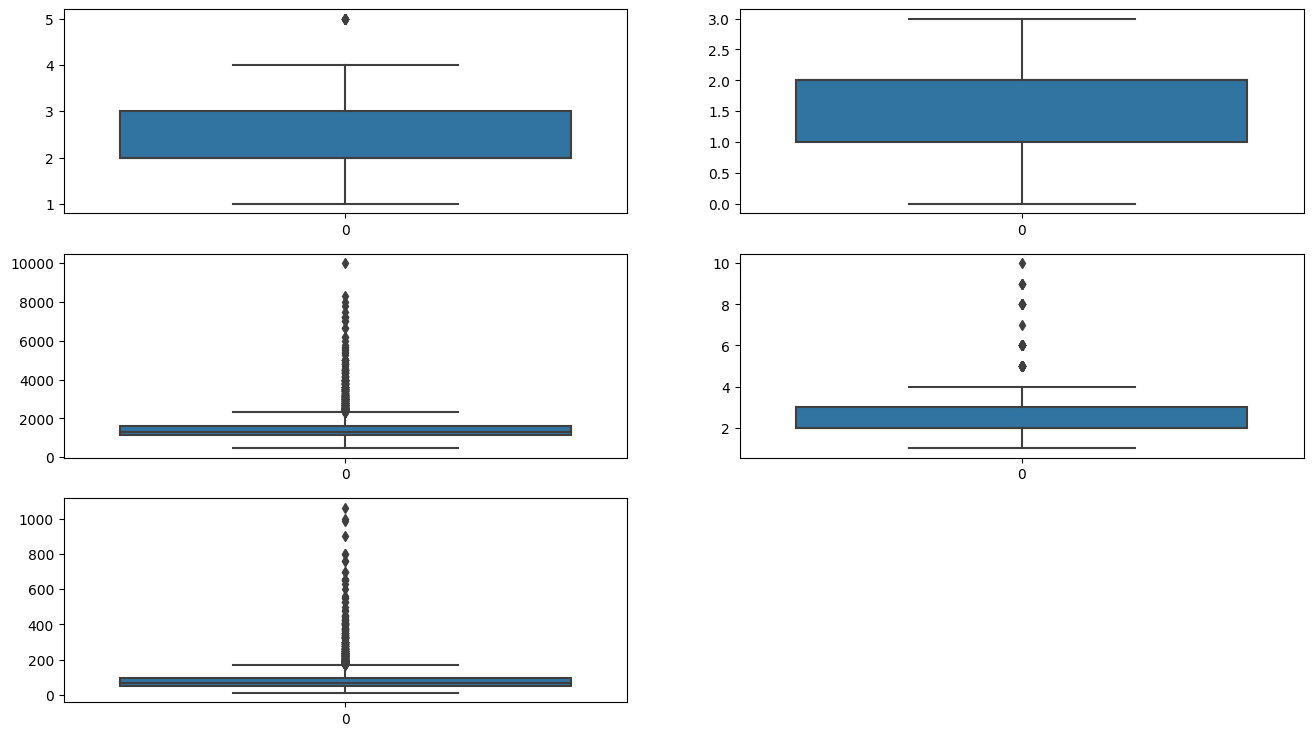

In [326]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df10[var])
df10.head()

In [327]:
df11 = df10.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df11.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,2.0,2.0,40.0,1200.0,2.0,3333.333333


In [328]:
df11.to_csv("clean_data.csv", index=False) # test ml model on this data
# ML model train on this data and got best score >>>> XGBoost=0.914710

# Categorical Variable Encoding

In [329]:
df10.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2 BHK,1100,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1200.0,2.0,3333.333333


In [330]:
df12 = df10.drop(["size","total_sqft"], axis =1)
df12.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1200.0,2.0,3333.333333


In [331]:
df13 = pd.get_dummies(df12, drop_first=True, columns=['area_type','availability','location'])
df13.shape

(4860, 743)

In [332]:
df13.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_16-Dec,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Nov,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jul,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Aug,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Block Jayanagar,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Adityanagar,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshayanagara West,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amam Enclave Layout,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjana Nagar,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Anugrah Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Arishinakunte,location_Ashirvad Colony,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BHEL Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bagalakunte,location_Bagalur,location_Balagere,location_Balaji Gardens Layout,location_Banagiri Nagar,location_Banashankari,location_Banashankari Stage II,location_Banashankari Stage I

In [333]:
df12.to_csv('oh_encoded_data_1.csv', index=False) # test ml model on this data

In [334]:
"""In ['area_type','availability','location'] contain multiple classe and if we convert them into OHE so it increase the size of DF 
so try to use those classes which are *frequently* present in the car var
 
## Working on <<<<<< area_type >>>>> feature
"""
 
df12['area_type'].value_counts()

area_type
Super built-up  Area    3523
Built-up  Area           884
Plot  Area               423
Carpet  Area              30
Name: count, dtype: int64

In [335]:
df14 = df12.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
    df14["area_type"+cat_var] = np.where(df14['area_type']==cat_var, 1,0)
df14.shape

(4860, 12)

In [336]:
df14.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2.0,1.0,70.0,1200.0,3.0,5833.333333,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1350.0,2.0,11037.037037,0,1,0


In [337]:
"""## Working with <<<<< availability >>>>> Feature"""
 
df14["availability"].value_counts()

availability
Ready To Move    3885
18-May            101
18-Apr             98
18-Dec             88
18-Aug             84
19-Dec             66
18-Jul             59
18-Jun             47
18-Mar             45
20-Dec             32
19-Mar             32
21-Dec             23
18-Feb             21
18-Sep             19
19-Jun             18
18-Oct             16
18-Nov             15
18-Jan             15
20-Jan             11
19-Jul             10
17-Dec             10
19-Jan             10
19-Sep              9
22-Jun              9
17-Oct              9
19-Aug              8
21-Jun              7
21-Mar              7
17-Nov              6
21-Jul              5
17-Sep              5
20-Jun              5
19-Apr              5
17-Jun              5
17-May              4
22-Dec              4
19-Oct              4
21-May              4
21-Jan              4
17-Jul              4
22-Jan              3
20-Nov              3
19-Nov              3
21-Sep              3
17-Aug             

In [338]:
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df14["availability_Ready To Move"] = np.where(df14["availability"]=="Ready To Move",1,0)
df14.shape

(4860, 13)

In [339]:
df14.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
7849,Super built-up Area,Ready To Move,Yeshwanthpur,3.0,1.584376,92.13,1000.0,2.0,9213.000000,1,0,0,1
7850,Super built-up Area,Ready To Move,Yeshwanthpur,2.0,2.000000,76.18,1182.0,2.0,6445.008460,1,0,0,1
7851,Super built-up Area,Ready To Move,Yeshwanthpur,2.0,1.000000,64.08,918.0,2.0,6980.392157,1,0,0,1
7853,Super built-up Area,Ready To Move,Yeshwanthpur,3.0,3.000000,138.00,1500.0,3.0,9200.000000,1,0,0,1
7855,Super built-up Area,Ready To Move,Yeshwanthpur,3.0,3.000000,135.00,1576.0,3.0,8565.989848,1,0,0,1


Working on <<<< Location >>>> feature

In [340]:
location_value_count = df14['location'].value_counts()
location_value_count

location
Whitefield                             109
Electronic City                         91
Uttarahalli                             73
Hennur Road                             73
Sarjapur  Road                          69
Bannerghatta Road                       66
Electronic City Phase II                62
Raja Rajeshwari Nagar                   60
Yelahanka                               57
Kanakpura Road                          50
Chandapura                              48
Thanisandra                             48
Haralur Road                            44
Bellandur                               44
Rajaji Nagar                            43
Hormavu                                 42
Begur Road                              41
Kasavanhalli                            41
Hebbal                                  39
Electronics City Phase 1                39
Marathahalli                            38
Kengeri                                 38
Banashankari                            38
7t

In [341]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Electronic City', 'Uttarahalli', 'Hennur Road',
       'Sarjapur  Road', 'Bannerghatta Road', 'Electronic City Phase II',
       'Raja Rajeshwari Nagar', 'Yelahanka', 'Kanakpura Road', 'Chandapura',
       'Thanisandra', 'Haralur Road', 'Bellandur', 'Rajaji Nagar', 'Hormavu',
       'Begur Road', 'Kasavanhalli', 'Hebbal', 'Electronics City Phase 1',
       'Marathahalli', 'Kengeri', 'Banashankari', '7th Phase JP Nagar',
       'KR Puram', 'Sarjapur', 'Jakkur', '8th Phase JP Nagar', 'Hoodi',
       'Old Madras Road', 'Harlur', 'TC Palaya', 'Koramangala', 'Hosa Road',
       'Varthur', 'HSR Layout', 'Hulimavu', 'Kothanur', 'JP Nagar',
       'Kaggadasapura', 'Gottigere', 'Akshaya Nagar', 'Rachenahalli',
       '9th Phase JP Nagar', 'Yelahanka New Town', 'Hennur', 'Kundalahalli',
       'Yeshwanthpur', 'Jigani', '5th Phase JP Nagar', 'Bisuvanahalli',
       'Nagarbhavi', 'Budigere', 'Attibele', 'Malleshwaram', 'Panathur'],
      dtype='object', name='location')

In [342]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df15 = df14.copy()
for cat_var in location_gert_20:
    df15['location_'+cat_var]=np.where(df15['location']==cat_var, 1,0)
df15.shape

(4860, 69)

Dropping Categorical variables

In [343]:
df16 = df15.drop(["area_type","availability",'location'], axis =1)
df16.shape

(4860, 66)

In [344]:
df16.head()
df16.to_csv('ohe_data_reduce_cat_class_1.csv', index=False)

# Training and saving

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [346]:
df = pd.read_csv('oh_encoded_data_1.csv')

In [347]:
print(df)

                 area_type   availability  \
0     Super built-up  Area  Ready To Move   
1           Built-up  Area  Ready To Move   
2     Super built-up  Area  Ready To Move   
3     Super built-up  Area         18-May   
4     Super built-up  Area  Ready To Move   
5     Super built-up  Area  Ready To Move   
6     Super built-up  Area  Ready To Move   
7     Super built-up  Area  Ready To Move   
8     Super built-up  Area  Ready To Move   
9           Built-up  Area  Ready To Move   
10    Super built-up  Area  Ready To Move   
11    Super built-up  Area  Ready To Move   
12    Super built-up  Area         20-Aug   
13    Super built-up  Area         18-May   
14    Super built-up  Area  Ready To Move   
15    Super built-up  Area         21-Nov   
16              Plot  Area  Ready To Move   
17          Built-up  Area  Ready To Move   
18              Plot  Area  Ready To Move   
19    Super built-up  Area  Ready To Move   
20              Plot  Area  Ready To Move   
21        

In [348]:
df.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1200.0,2.0,3333.333333


In [349]:
# This file contain [area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft]
# and ['area_type','availability','location'] this are cat var
# We encoded few classes from above car var in OHE 
 
df_new.shape
 
df_new.shape
 
df_new.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2.0,1.0,70.0,1200.0,3.0,5833.333333
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1350.0,2.0,11037.037037
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1597.0,4.0,9392.611146
3,Super built-up Area,18-May,Devarachikkanahalli,2.0,3.0,44.0,1125.0,2.0,3911.111111
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1200.0,2.0,3333.333333


Splitting into training and testing data

In [350]:
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (4860, 8)
Shape of y =  (4860,)


In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (3888, 8)
Shape of y_train =  (3888,)
Shape of X_test =  (972, 8)
Shape of y_test =  (972,)


In [352]:
 
"""## Feature Scaling"""
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Super built-up  Area'